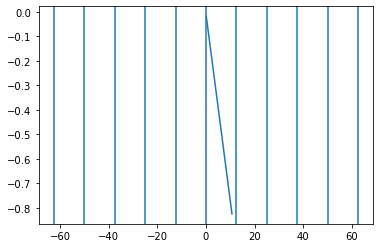

In [567]:
'''In mathematics, Buffon's needle problem is a question first posed in the 18th century 
   by Georges-Louis Leclerc, Comte de Buffon:
   
   Suppose we have a floor made of parallel strips of wood, 
   each the same width, and we drop a needle onto the floor. 
   
   What is the probability that the needle will lie across a line between two strips?'''

#We aim to solve this problem via a simulation

import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

'''We start by creating a plot to show how the experiment would look'''

width_floor = 1/random.random() - 1 #width can go from 0 to infinity

#For the needle we need 2 co-ordinates x,y can go from 0 to infinity 
sign_list = [-1,1]
x1 = random.random() * width_floor       #Due to symmetry of floor x1 goes from 0 to w      
y1 = (1/random.random() -1) * random.choice(sign_list)  # -inf to inf
x2 = (1/random.random() -1) * random.choice(sign_list)  # -inf to inf
y2 = (1/random.random() -1) * random.choice(sign_list)  # -inf to inf

x_values = [x1,x2]
y_values = [y1,y2]
length_needle = ((x2-x1)**2+(y2-y1)**2)**0.5

#We are going to place 10 floorboards now we have a grid lets see where our needle lands
#first floorboard is at x = 0 all other ones at ..-2,-w , w , 2w, ... 


plt.axvline(x = 0)
plt.axvline(x = -1 * width_floor)
plt.axvline(x =  width_floor)
plt.axvline(x = -2 * width_floor)
plt.axvline(x = 2 * width_floor)
plt.axvline(x = -3 * width_floor)
plt.axvline(x = 3 * width_floor)
plt.axvline(x = -4  * width_floor)
plt.axvline(x = 4  * width_floor)
plt.axvline(x = -5  * width_floor)
plt.axvline(x = 5 * width_floor)
plt.plot(x_values, y_values)

#Everytime we run this it simulates a single trial
#Our floorboard is infinite so our plot is to give us an idea


In [568]:
'''Now that we have the visual representation working 
    we need to check if our needle crosses the floor boards'''

#This creates our needle and floor of random length along with necessary properties

class Needle_and_floor():
    
    def __init__ (self):
      
        sign_list = [-1,1]
        self.floor_width = 1/random.random() - 1
        self.x1 = random.random() * self.floor_width       #Due to symmetry of floor x1 goes from 0 to w      
        self.y1 = (1/random.random() -1) * random.choice(sign_list)  # -inf to inf
        self.x2 = (1/random.random() -1) * random.choice(sign_list)  # -inf to inf
        self.y2 = (1/random.random() -1) * random.choice(sign_list)  # -inf to inf

        self.x_values = [self.x1,self.x2]
        self.y_values = [self.y1,self.y2]
        self.needle_length = ((x2-x1)**2+(y2-y1)**2)**0.5
    
    def __str__(self):
        return f'{self.x1},{self.x2},{self.y1},{self.y2},{self.x_values},{self.y_values},{self.needle_length},{self.floor_width}' 
     

In [577]:
#This is the function that checks if we cross a floorboard

def crosses_floorboard(trial):
    crosses = False
    
    if trial.x1 < trial.x2:
        if trial.x2 > trial.floor_width:
            crosses = True
    elif trial.x1 > trial.x2:
        if trial.x2 < 0:
            crosses = True
            
    return crosses


In [517]:
#We have our experiment now lets count how many crosses we get in 1 000 000 trials

success_count = 0
number_of_trials = 1000000

for i in range(number_of_trials):
    trial_i = Needle_and_floor()
    
    if crosses_floorboard(trial_i) == True:
        success_count += 1
        
probability = float(success_count)/float(number_of_trials)
print(probability)

#for 1 000 000 trials we got a probability of 0.74983,0.74984 ,0.750445 , 0.749993

0.749644


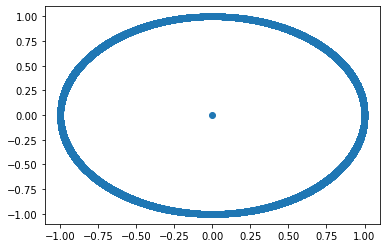

In [570]:
'''Now lets fix the lenth of the needle and use our simulation to estimate pi'''

'''We need a way to generate random points that lie on a circle so lets check if we can simulate
plotting points on a circle, scatter plot will show if we have succeeded'''

u = 0                            #circle center x-coordinate
v = 0                            #circle center y-coordinate
rad = 1                          #circle radius
x_list = [u]
y_list = [v]

for t in range(10000):
    angle = 360 * random.random() # 360 * (0 ----> 1) 
    theta = math.radians(angle)

    x_on_circle = rad*math.cos(theta) + u
    y_on_circle = rad*math.sin(theta) + v
    
    x_list.append(x_on_circle)
    y_list.append(y_on_circle)


plt.scatter(x_list,y_list)


#looks like its working

In [580]:
'''We are going to have floorboards of length 1 and needle length of 5/6
   we now create a new needle and floor class with our fixed parameters'''

class Fixed_needle_and_floor():
    
    def __init__ (self):
      
        sign_list = [-1,1]
        self.floor_width = 1
        self.x1 = random.random()       #Due to symmetry of floor x1 goes from 0 to 1   
        self.y1 = (1/random.random() -1) * random.choice(sign_list)  # -inf to inf
        self.theta = math.radians(360 * random.random())
        self.x2 =  (5.0/6.0) * (math.cos(self.theta))  + self.x1     # x2 on circle of radius    
        self.y2 =  (5.0/6.0) * (math.sin(self.theta))  + self.y1     # y2 on circle of radius 

        self.x_values = [self.x1,self.x2]
        self.y_values = [self.y1,self.y2]
        self.needle_length = 5.0/6.0
    
    def __str__(self):
        return f'{self.x1},{self.x2},{self.y1},{self.y2},{self.x_values},{self.y_values},{self.needle_length},{self.floor_width}' 
     

In [585]:
#We have our experiment now lets count how many crosses we get in 1 000 000 trials

success_counter = 0
no_of_trials = 100000000
trial_n = ''

for i in range(no_of_trials):
    trial_n = Fixed_needle_and_floor()
    
    if crosses_floorboard(trial_n) == True:
        success_counter += 1
        
probability = float(success_counter)/float(no_of_trials)
estimate_of_pi = (5.0/3.0) * (1.0/(float(probability)))
print(probability,'\n','Pi_est =',estimate_of_pi,'\n','Error =',abs(math.pi - estimate_of_pi))

#for 10 000 000 trials we got a probability of 0.5307822,0.5308123
#pi_est = 3.140019892654024, 3.139841836119221 
#Error = 0.0015727609357689687, 0.0017508174705720414 

'''
number of trials = 100 000 000 (took long to run so result here)
probality = 0.53048176 
Pi_est = 3.1417982527178063 
Error = 0.0002055991280132119   

Conclusion the greater the number of trials the better the estimate
in a hundred million trials we estimated pi correctly to 3 decimal places

Thus our simulation was successful 
'''

0.53048176 
 Pi_est = 3.1417982527178063 
 Error = 0.0002055991280132119
